In [2]:
LBranchyNet =     [20.48959374 , 18.74048877  , 112.3120935 , 19.04124212]
BranchyNet =      [23.00081348, 72.48458767 ,154.67515755 ,56.82508731]
EncodeNet  =[ 18.76804352,18.94773793  ,112.60272455 ,18.96781874]
LeNet = [127.355534554,130.057503939  ,760.110302925 ,128.145107508]

LBranchyNet = list(map(lambda x, y: x/y, LBranchyNet, LeNet))
EncodeNet = list(map(lambda x, y: x/y, EncodeNet, LeNet))
BranchyNet = list(map(lambda x, y: x/y, BranchyNet, LeNet))
LeNet = [1.0, 1.0,1., 1.]
print("LBranchyNet ", LBranchyNet)
print("BranchyNet ", BranchyNet)
print("EncodeNet ", EncodeNet)
print("LeNet ", LeNet)


LBranchyNet  [0.16088498871882329, 0.14409386773092098, 0.1477576255285699, 0.14859125323072728]
BranchyNet  [0.18060317174710167, 0.557327224302236, 0.20349041047699332, 0.4434432840633612]
EncodeNet  [0.14736731768843672, 0.14568738716442636, 0.14813997931180586, 0.1480182826239843]
LeNet  [1.0, 1.0, 1.0, 1.0]


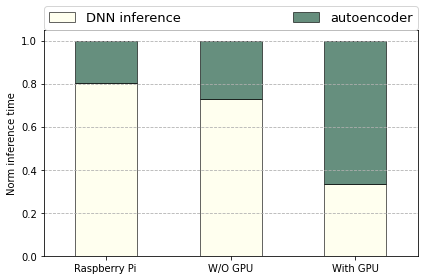

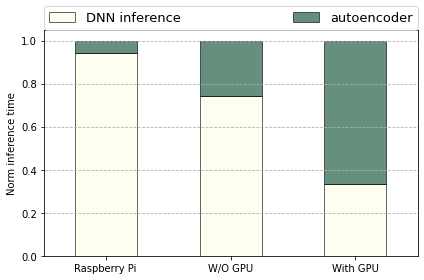

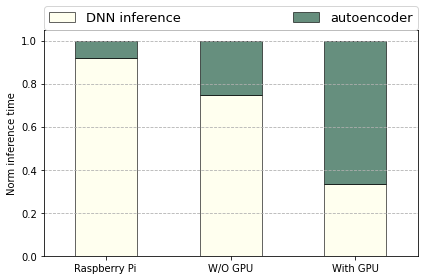

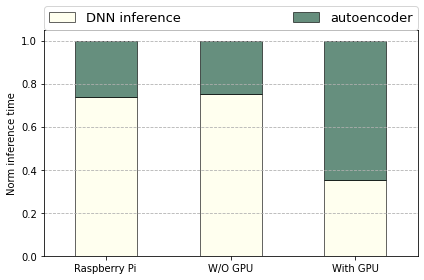

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def stacked_inference_time(rasp_bnet, rasp_auto, name="mnist"):
    df = pd.DataFrame({'DNN inference': rasp_bnet,
                   'autoencoder': rasp_auto,
                  }, 
                  index=['Raspberry Pi ', 'W/O GPU','With GPU'])


    ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=False, stacked=True)
    ax.set_ylim(0., 1.05, 0.05)
    ax.grid(linestyle='dashed', axis='y')
    ax.set_ylabel('Norm inference time')
    #plt.xticks(rotation=15)

    # ask matplotlib for the plotted objects and their labels
    lines, labels = ax.get_legend_handles_labels()

    ax.legend(lines , labels, loc='lower left', ncol=2, bbox_to_anchor=(0, 1, 1., 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )

    plt.tight_layout()
    plt.savefig('evaluation_stack_infer_time_{}.pdf'.format(name)) 
    plt.show()
    
#MNIST

rasp_auto = [3.67, 0.72, 0.7]
rasp_bnet = [15.095, 1.95, 0.353]

rasp_total = [x+y for x, y in zip(rasp_auto, rasp_bnet)]
rasp_auto = [x/y for x, y in zip(rasp_auto, rasp_total)]
rasp_bnet = [x/y for x, y in zip(rasp_bnet, rasp_total)]
stacked_inference_time(rasp_bnet, rasp_auto)

#FMNIST
rasp_auto = [4.19, 0.69, 0.69]
rasp_bnet = [68.29, 1.9757, 0.348]
rasp_total = [x+y for x, y in zip(rasp_auto, rasp_bnet)]
rasp_auto = [x/y for x, y in zip(rasp_auto, rasp_total)]
rasp_bnet = [x/y for x, y in zip(rasp_bnet, rasp_total)]
stacked_inference_time(rasp_bnet, rasp_auto, 'fmnist')

#QMNIST
rasp_auto = [9.24, 3.92, 4.1]
rasp_bnet = [103.35, 11.58, 2.07]
rasp_total = [x+y for x, y in zip(rasp_auto, rasp_bnet)]
rasp_auto = [x/y for x, y in zip(rasp_auto, rasp_total)]
rasp_bnet = [x/y for x, y in zip(rasp_bnet, rasp_total)]
stacked_inference_time(rasp_bnet, rasp_auto,'qmnist')

#KMNIST
rasp_auto = [4.985, 0.65, 0.65]
rasp_bnet = [13.98, 1.9546, 0.352]
rasp_total = [x+y for x, y in zip(rasp_auto, rasp_bnet)]
rasp_auto = [x/y for x, y in zip(rasp_auto, rasp_total)]
rasp_bnet = [x/y for x, y in zip(rasp_bnet, rasp_total)]

stacked_inference_time(rasp_bnet, rasp_auto, 'kmnist')



In [4]:
#inference data with GPU
('EncodeNet ', [0.2620953973729138, 0.2626668366913202, 0.1696792154907338, 0.25320055904961564])
('BranchyNet ', [0.4428974600188147, 0.8607498087222647, 0.5684367988032909, 0.9056603773584906])
('LBranchyNet ', [0.13358419567262464, 0.1331293037490436, 0.143605086013463, 0.1328301886792453])
('LeNet ', [1.0, 1.0, 1.0, 1.0])
#inference data without GPU

('EncodeNet ', [2.6657, 2.6657, 15.488, 2.6046])
('BranchyNet ', [3.95, 7.63, 25, 9])
('LBranchyNet ', [1.95, 1.94, 11, 1.96])
('LeNet ', [13.22, 13.35, 80, 13.5])

#Energy data with GPU use delta power
('EncodeNet ', [0.2620953973729138, 0.2626668366913202, 0.1696792154907338, 0.25320055904961564])
('BranchyNet ', [0.4428974600188147, 0.8607498087222647, 0.5684367988032909, 0.9056603773584906])
('LBranchyNet ', [0.13358419567262464, 0.1331293037490436, 0.143605086013463, 0.1328301886792453])
('LeNet ', [1.0, 1.0, 1.0, 1.0])

#GPU use runtime power

('EncodeNet ', [0.19173662629847057, 0.19215906559615697, 0.19445817950070324, 0.18768250935435077])
('BranchyNet ', [0.44289746001881464, 0.8607498087222647, 0.529296875, 0.9056603773584906])
('LBranchyNet ', [0.1335841956726246, 0.1331293037490436, 0.13346354166666666, 0.1328301886792453])
('LeNet ', [1.0, 1.0, 1.0, 1.0])

#Energy data without GPU

('EncodeNet ', [0.19678048506174647, 0.19506483860135648, 0.18951875380604638, 0.1886359782032497])
('BranchyNet ', [0.29878971255673226, 0.5715355805243446, 0.31398548911683766, 0.6666666666666666])
('LBranchyNet ', [0.14750378214826024, 0.14531835205992508, 0.14560920690517892, 0.1451851851851852])
('LeNet ', [1.0, 1.0, 1.0, 1.0])


#Energy RaspberryPi
('LBranchyNet ', [0.16088498871882329, 0.14409386773092098, 0.1477576255285699, 0.14859125323072728])
('BranchyNet ', [0.18060317174710167, 0.557327224302236, 0.20349041047699332, 0.4434432840633612])
('EncodeNet ', [0.14736731768843672, 0.14568738716442636, 0.14813997931180586, 0.1480182826239843])
('LeNet ', [1.0, 1.0, 1.0, 1.0])

('LeNet ', [1.0, 1.0, 1.0, 1.0])

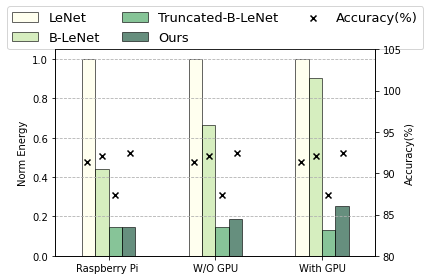

In [5]:
#kmnist 
EncodeNet_data=[0.14859125323072728, 0.1886359782032497,  0.18768250935435077]
BranchyNet_data=[0.4434432840633612, 0.6666666666666666, 0.9056603773584906]
LBranchyNet_data=[0.1480182826239843, 0.1451851851851852, 0.1328301886792453]

EncodeNet_data=[0.14859125323072728, 0.1886359782032497,  0.25320055904961564]


LeNet_data=[1.0, 1.0, 1.0]

df = pd.DataFrame({'Truncated-B-LeNet': LBranchyNet_data,
                   'LeNet': LeNet_data,
                   'B-LeNet': BranchyNet_data,
                   'Ours': EncodeNet_data, 
                  }, 
                  index=['Raspberry Pi ', 'W/O GPU','With GPU'])
suborder = ['LeNet', 'B-LeNet', 'Truncated-B-LeNet', 'Ours']
df = df[suborder]


ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=False)
ax.set_ylim(0., 1.05, 0.05)
ax.grid(linestyle='dashed', axis='y')
ax.set_ylabel('Norm Energy')
#ax.set_xlabel('datasets')
#plt.xticks(rotation=15)


# function to add value labels
def addlabels1(x,y, shift=0, h=0):
    for i in range(len(x)):
        ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')
        
#addlabels1(Branchynet, LBranchynet, -0.05)
#addlabels1(Branchynet, AutoLBranchynet, 0.22, 0.02)
#addlabels1(Branchynet, Branchynet, -0.2)


Branchynet2 =[         92.05] *3
LBranchynet2 =[     87.39] * 3
Lenet =      [         91.4] * 3
EncodeNet2  =[      92.5] * 3


ax2=ax.twinx()
x = [0, 1, 2]
x1 = list(map(lambda k: k-0.2, x))
x2 = list(map(lambda k: k-0.06, x))
x3 = list(map(lambda k: k+0.06, x))
x4 = list(map(lambda k: k+0.2, x))


ax2.scatter(x1, Lenet, marker="x", color='black')
ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
ax2.scatter(x4, EncodeNet2, marker="x", color='black')


ax2.set_ylim(80, 105, 5)
ax2.set_ylabel('Accuracy(%)')


x= [0,1, 2, 3]


#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.6, box.height*0.2])

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()



ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=3, bbox_to_anchor=(-0.15, 1, 1.3, 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )

plt.tight_layout()
plt.savefig('evaluation_k_mnist_energy2.pdf') 
plt.show()

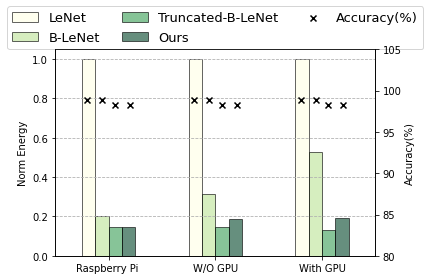

In [9]:
#qmnist 
EncodeNet_data=[0.1477576255285699, 0.18951875380604638,  0.19445817950070324]

BranchyNet_data=[0.20349041047699332, 0.31398548911683766, 0.529296875]
LBranchyNet_data=[0.14813997931180586, 0.14560920690517892, 0.13346354166666666]
LeNet_data=[1.0, 1.0, 1.0]




df = pd.DataFrame({'Truncated-B-LeNet': LBranchyNet_data,
                   'LeNet': LeNet_data,
                   'B-LeNet': BranchyNet_data,
                   'Ours': EncodeNet_data, 
                  }, 
                  index=['Raspberry Pi ', 'W/O GPU','With GPU'])
suborder = ['LeNet', 'B-LeNet', 'Truncated-B-LeNet', 'Ours']
df = df[suborder]


ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=False)
ax.set_ylim(0., 1.05, 0.05)
ax.grid(linestyle='dashed', axis='y')
ax.set_ylabel('Norm Energy')
#plt.xticks(rotation=15)

# function to add value labels
def addlabels1(x,y, shift=0, h=0):
    for i in range(len(x)):
        ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')
        
#addlabels1(Branchynet, LBranchynet, -0.05)
#addlabels1(Branchynet, AutoLBranchynet, 0.22, 0.02)
#addlabels1(Branchynet, Branchynet, -0.2)


Branchynet2 =[     98.89 ] *3
LBranchynet2 =[   98.24] * 3
Lenet =      [     98.83] * 3
EncodeNet2  =[      98.3] * 3

#Branchynet2 =[     87.8 ,      98.89,      92.05] *3
#LBranchynet2 =[   87.05 ,     98.24 ,     87.39] * 3
#Lenet =      [     84.9,       98.83,        91.4] * 3
#EncodeNet2  =[     89.59 ,     98.3 ,       92.5] * 3


ax2=ax.twinx()
x = [0, 1, 2]
x1 = list(map(lambda k: k-0.2, x))
x2 = list(map(lambda k: k-0.06, x))
x3 = list(map(lambda k: k+0.06, x))
x4 = list(map(lambda k: k+0.2, x))


ax2.scatter(x1, Lenet, marker="x", color='black')
ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
ax2.scatter(x4, EncodeNet2, marker="x", color='black')


ax2.set_ylim(80, 105, 5)
ax2.set_ylabel('Accuracy(%)')


x= [0,1, 2, 3]


#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.6, box.height*0.2])

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()



ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=3, bbox_to_anchor=(-0.15, 1, 1.3, 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )

plt.tight_layout()
plt.savefig('evaluation_q_mnist_energy2.pdf') 
plt.show()

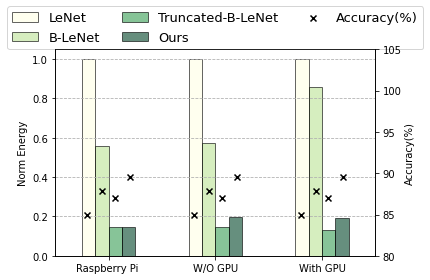

In [10]:
#Fmnist 
EncodeNet_data=[0.14409386773092098, 0.19506483860135648,  0.19215906559615697]
BranchyNet_data=[0.557327224302236, 0.5715355805243446, 0.8607498087222647]
LBranchyNet_data=[0.14568738716442636, 0.14531835205992508, 0.1331293037490436]
LeNet_data=[1.0, 1.0, 1.0]

df = pd.DataFrame({'Truncated-B-LeNet': LBranchyNet_data,
                   'LeNet': LeNet_data,
                   'B-LeNet': BranchyNet_data,
                   'Ours': EncodeNet_data, 
                  }, 
                  index=['Raspberry Pi ', 'W/O GPU','With GPU'])
suborder = ['LeNet', 'B-LeNet', 'Truncated-B-LeNet', 'Ours']
df = df[suborder]


ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=False)
ax.set_ylim(0., 1.05, 0.05)
ax.grid(linestyle='dashed', axis='y')
ax.set_ylabel('Norm Energy')
#plt.xticks(rotation=15)

# function to add value labels
def addlabels1(x,y, shift=0, h=0):
    for i in range(len(x)):
        ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')
        
#addlabels1(Branchynet, LBranchynet, -0.05)
#addlabels1(Branchynet, AutoLBranchynet, 0.22, 0.02)
#addlabels1(Branchynet, Branchynet, -0.2)


Branchynet2 =[     87.8 ] *3
LBranchynet2 =[   87.05] * 3
Lenet =      [     84.9] * 3
EncodeNet2  =[     89.59] * 3

#Branchynet2 =[     87.8 ,      98.89,      92.05] *3
#LBranchynet2 =[   87.05 ,     98.24 ,     87.39] * 3
#Lenet =      [     84.9,       98.83,        91.4] * 3
#EncodeNet2  =[     89.59 ,     98.3 ,       92.5] * 3


ax2=ax.twinx()
x = [0, 1, 2]
x1 = list(map(lambda k: k-0.2, x))
x2 = list(map(lambda k: k-0.06, x))
x3 = list(map(lambda k: k+0.06, x))
x4 = list(map(lambda k: k+0.2, x))


ax2.scatter(x1, Lenet, marker="x", color='black')
ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
ax2.scatter(x4, EncodeNet2, marker="x", color='black')


ax2.set_ylim(80, 105, 5)
ax2.set_ylabel('Accuracy(%)')


x= [0,1, 2, 3]


#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.6, box.height*0.2])

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()



ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=3, bbox_to_anchor=(-0.15, 1, 1.3, 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )

plt.tight_layout()
plt.savefig('evaluation_f_mnist_energy2.pdf') 
plt.show()

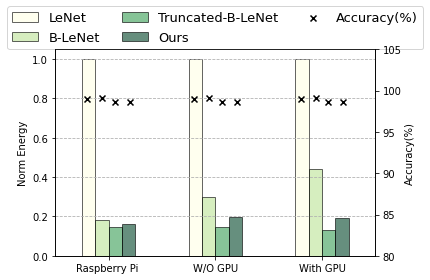

In [21]:
#mnist 
EncodeNet_data=[0.16088498871882329, 0.19678048506174647,  0.19173662629847057]
BranchyNet_data=[0.18060317174710167, 0.29878971255673226, 0.4428974600188147]
LBranchyNet_data=[0.14736731768843672, 0.14750378214826024, 0.13358419567262464]
LeNet_data=[1.0, 1.0, 1.0]

df = pd.DataFrame({'Truncated-B-LeNet': LBranchyNet_data,
                   'LeNet': LeNet_data,
                   'B-LeNet': BranchyNet_data,
                   'Ours': EncodeNet_data, 
                  }, 
                  index=['Raspberry Pi ', 'W/O GPU','With GPU'])
suborder = ['LeNet', 'B-LeNet', 'Truncated-B-LeNet', 'Ours']
df = df[suborder]


ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=False)
ax.set_ylim(0., 1.05, 0.05)
ax.grid(linestyle='dashed', axis='y')
ax.set_ylabel('Norm Energy')
#plt.xticks(rotation=15)

# function to add value labels
def addlabels1(x,y, shift=0, h=0):
    for i in range(len(x)):
        ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')
        
#addlabels1(Branchynet, LBranchynet, -0.05)
#addlabels1(Branchynet, AutoLBranchynet, 0.22, 0.02)
#addlabels1(Branchynet, Branchynet, -0.2)

Branchynet2 =[ 99.12 ] *3
LBranchynet2 =[98.58 ] * 3
Lenet =      [99.03] * 3
EncodeNet2  =[ 98.61 ] * 3

ax2=ax.twinx()
x = [0, 1, 2]
x1 = list(map(lambda k: k-0.2, x))
x2 = list(map(lambda k: k-0.06, x))
x3 = list(map(lambda k: k+0.06, x))
x4 = list(map(lambda k: k+0.2, x))


ax2.scatter(x1, Lenet, marker="x", color='black')
ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
ax2.scatter(x4, EncodeNet2, marker="x", color='black')


ax2.set_ylim(80, 105, 5)
ax2.set_ylabel('Accuracy(%)')


x= [0,1, 2, 3]


#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.6, box.height*0.2])

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()



ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=3, bbox_to_anchor=(-0.15, 1, 1.3, 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )

plt.tight_layout()
plt.savefig('evaluation_mnist_energy2.pdf') 
plt.show()

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes',edgecolor='black')


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def draw_figure_time(Branchynet, LBranchynet,Lenet, EncodeNet, file_name, y_scale=20):
    
    print("EncodeNet ", EncodeNet)
    print("BranchyNet ", Branchynet)
    print("LBranchyNet ", LBranchynet)
    print("LeNet ", Lenet)
    

    # function to add value labels
    # function to add value labels
    def addlabels1(x,y, shift=0, h=0):
        for i in range(len(x)):
            ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')

    df = pd.DataFrame({'B-LeNet1': LBranchynet,
                   'LeNet': Lenet,
                   'B-LeNet': Branchynet,
                   'Ours': EncodeNet, 
                  }, 
                  index=['MNIST ', 'FMNIST','QMNIST','KMINST',])
    suborder = ['LeNet', 'B-LeNet', 'B-LeNet1', 'Ours']
    df = df[suborder]

    ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black', alpha=0.6,sort_columns=False)
    #ax.set_ylim(0,y_scale)
    ax.grid(linestyle='dashed', axis='y')
    ax.set_ylabel('Inference time(s)')
    ax.set_xlabel('datasets')
    #ax.set_yscale('log')
    plt.legend(bbox_to_anchor=(0, 1, 1, 0.02), ncol=2, loc="lower left", mode="expand",borderaxespad=0., prop={'size': 13})

    x = [1, 2, 3, 4]

    #addlabels(x, LBranchynet, 0.06)
    #addlabels(x, Branchynet, -0.06)
    #addlabels(x, EncodeNet, 0.2)
    #addlabels(x, Lenet, -0.2)

    plt.tight_layout()
    plt.savefig('{}.pdf'.format(file_name)) 
    plt.show()


EncodeNet  [2.6657, 2.6657, 15.488, 2.6046]
BranchyNet  [3.95, 7.63, 25, 9]
LBranchyNet  [1.95, 1.94, 11, 1.96]
LeNet  [13.22, 13.35, 80, 13.5]


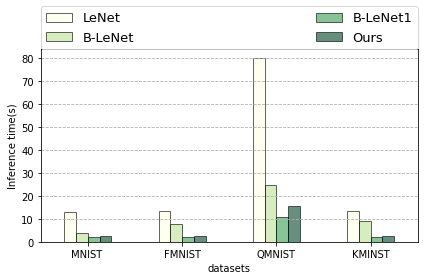

In [19]:
#plt.legend(bbox_to_anchor=(0, 1, 1, 0.02), ncol=3, loc="lower left", mode="expand", borderaxespad=0.)


Branchynet =    [ 3.95,7.63,25,9 ]

LBranchynet =   [1.95,1.94,11,1.96]
Lenet =         [13.22,13.35,80,13.5 ]

EncodeNetCPU1=      [1.9457,1.9757,11.568,1.9546 ]

EncodeNetCPU2=      [0.72,0.69,3.92,0.65 ]
EncodeNet = [a+b for a, b in zip(EncodeNetCPU1, EncodeNetCPU2)]

draw_figure_time(Branchynet, LBranchynet,Lenet, EncodeNet, "local_server_time", 90)

EncodeNet  [1.053, 1.0379999999999998, 6.17, 1.002]
BranchyNet  [1.177, 2.25, 8.13, 2.4]
LBranchyNet  [0.355, 0.348, 2.05, 0.352]
LeNet  [2.6575, 2.614, 15.36, 2.65]


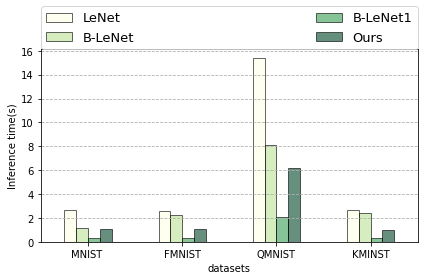

In [20]:
# GPU MNIST, FMNIST, QMNIST, KMNIST
BranchyNet = [1.177,2.25,8.13,2.4]
LBranchyNet = [ 0.355,0.348,2.05,0.352]
LeNet = [2.6575,2.614,15.36,2.65]
EncodeNet = [0.7+0.353, 0.348+0.69, 4.1+2.07, 0.352+0.65]

draw_figure_time(BranchyNet, LBranchyNet,LeNet, EncodeNet, "gpu_server_time", 15)

EncodeNet  [0.19173662629847057, 0.19215906559615697, 0.19445817950070324, 0.18768250935435077]
BranchyNet  [0.44289746001881464, 0.8607498087222647, 0.529296875, 0.9056603773584906]
LBranchyNet  [0.1335841956726246, 0.1331293037490436, 0.13346354166666666, 0.1328301886792453]
LeNet  [1.0, 1.0, 1.0, 1.0]
EncodeNet to BranchyNet [56, 77, 63, 79]
EncodeNet to Lenet [80, 80, 80, 81]


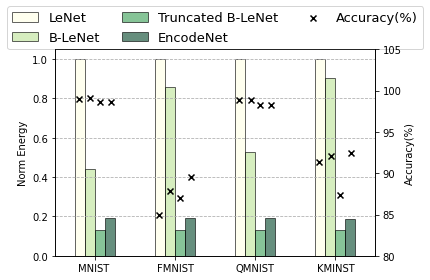

In [23]:
# vm with 2 core at google cloud with GPU

BranchyNet = [1.177,2.25,8.13,2.4]
LBranchyNet = [ 0.355,0.348,2.05,0.352]
LeNet = [2.6575,2.614,15.36,2.65]

GPU_power = 79

BranchyNet = [val*GPU_power for val in BranchyNet]
LBranchyNet = [val*GPU_power for val in LBranchyNet]
LeNet = [val*GPU_power for val in LeNet]


EncodeNetGPU = [0.353, 0.348, 2.07, 0.352]

EncodeNetCPU = [0.7, 0.69, 4.1, 0.65]

EncodeNetGPU = [val*GPU_power for val in EncodeNetGPU]
EncodeNetCPU = [val*(140*0.85 + 40)/9 for val in EncodeNetCPU]

EncodeNet = [a+b for a, b in zip(EncodeNetCPU, EncodeNetGPU)]

LBranchyNet = list(map(lambda x, y: x/y, LBranchyNet, LeNet))
EncodeNet = list(map(lambda x, y: x/y, EncodeNet, LeNet))
BranchyNet = list(map(lambda x, y: x/y, BranchyNet, LeNet))
LeNet = [1.0, 1.0,1., 1.]

print("EncodeNet ", EncodeNet)
print("BranchyNet ", BranchyNet)
print("LBranchyNet ", LBranchyNet)
print("LeNet ", LeNet)


print("EncodeNet to BranchyNet", list(map(lambda x, y: int((1-x/y)*100), EncodeNet, BranchyNet)))
print("EncodeNet to Lenet", list(map(lambda x, y: int((1-x/y)*100), EncodeNet, LeNet)))

df = pd.DataFrame({'LeNet': LeNet,
                   'Truncated B-LeNet': LBranchyNet, 
                   'B-LeNet': BranchyNet,
                   'EncodeNet': EncodeNet}, 
                  index=['MNIST ', 'FMNIST','QMNIST','KMINST',])

suborder = ['LeNet', 'B-LeNet', 'Truncated B-LeNet', 'EncodeNet']
df = df[suborder]

ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=False)
ax.set_ylim(0., 1.05, 0.05)
ax.grid(linestyle='dashed', axis='y')
ax.set_ylabel('Norm Energy')
#plt.xticks(rotation=15)

# function to add value labels
def addlabels1(x,y, shift=0, h=0):
    for i in range(len(x)):
        ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')
        
#addlabels1(Branchynet, LBranchynet, -0.05)
#addlabels1(Branchynet, AutoLBranchynet, 0.22, 0.02)
#addlabels1(Branchynet, Branchynet, -0.2)

Branchynet2 =[ 99.12 ,     87.8 ,      98.89,      92.05]
LBranchynet2 =[98.58  ,    87.05 ,     98.24 ,     87.39]
Lenet =      [99.03,       84.9,       98.83,        91.4]
EncodeNet2  =[ 98.61 ,     89.59 ,     98.3 ,       92.5]

ax2=ax.twinx()
x = [0, 1, 2, 3]
x1 = list(map(lambda k: k-0.2, x))
x2 = list(map(lambda k: k-0.06, x))
x3 = list(map(lambda k: k+0.06, x))
x4 = list(map(lambda k: k+0.2, x))

ax2.scatter(x1, Lenet, marker="x", color='black')
ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
ax2.scatter(x4, EncodeNet2, marker="x", color='black')


ax2.set_ylim(80, 105, 5)
ax2.set_ylabel('Accuracy(%)')


x= [0,1, 2, 3]


#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.6, box.height*0.2])

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()



ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=3, bbox_to_anchor=(-0.15, 1, 1.3, 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )

plt.tight_layout()
plt.savefig('gpu_server_energy.pdf') 
plt.show()

EncodeNet  [0.19678048506174647, 0.19506483860135648, 0.18951875380604638, 0.1886359782032497]
BranchyNet  [0.29878971255673226, 0.5715355805243446, 0.31398548911683766, 0.6666666666666666]
LBranchyNet  [0.14750378214826024, 0.14531835205992508, 0.14560920690517892, 0.1451851851851852]
LeNet  [1.0, 1.0, 1.0, 1.0]
EncodeNet to BranchyNet [34, 65, 39, 71]
EncodeNet to Lenet [80, 80, 81, 81]


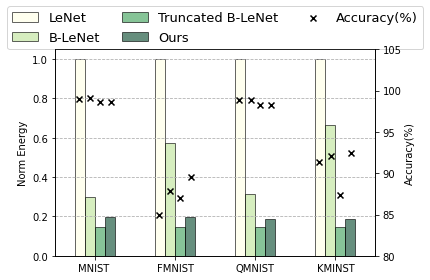

In [24]:
# vm with 2 core at google cloud
BranchyNet =    [ 3.95,7.63, 25.1, 9 ]

LBranchyNet =   [1.95,1.94, 11.64,  1.96]
LeNet =         [13.22,13.35, 79.94, 13.5 ]

EncodeNetCPU1=      [1.9457,1.9757,11.58,1.9546 ]
EncodeNetCPU2=      [0.72,0.69,   3.92,  0.65 ]

EncodeNetCPU1 = [val*(140*1 + 40)/9 for val in EncodeNetCPU1]
EncodeNetCPU2 = [val*(140*0.85**0.75 + 40)/9 for val in EncodeNetCPU2]
EncodeNet = [a+b for a, b in zip(EncodeNetCPU1, EncodeNetCPU2)]

BranchyNet = [val*(140*1 + 40)/9 for val in BranchyNet]
LBranchyNet = [val*(140*1 + 40)/9 for val in LBranchyNet]
LeNet = [val*(140*1 + 40)/9 for val in LeNet]



LBranchyNet = list(map(lambda x, y: x/y, LBranchyNet, LeNet))
EncodeNet = list(map(lambda x, y: x/y, EncodeNet, LeNet))
BranchyNet = list(map(lambda x, y: x/y, BranchyNet, LeNet))
LeNet = [1.0, 1.0,1., 1.]


print("EncodeNet ", EncodeNet)
print("BranchyNet ", BranchyNet)
print("LBranchyNet ", LBranchyNet)
print("LeNet ", LeNet)
print("EncodeNet to BranchyNet", list(map(lambda x, y: int((1-x/y)*100), EncodeNet, BranchyNet)))
print("EncodeNet to Lenet", list(map(lambda x, y: int((1-x/y)*100), EncodeNet, LeNet)))

df = pd.DataFrame({'LeNet': LeNet,
                   'Truncated B-LeNet': LBranchyNet, 
                   'B-LeNet': BranchyNet,
                   'Ours': EncodeNet}, 
                  index=['MNIST ', 'FMNIST','QMNIST','KMINST',])

suborder = ['LeNet', 'B-LeNet', 'Truncated B-LeNet', 'Ours']
df = df[suborder]

ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=False)
ax.set_ylim(0., 1.05, 0.05)
ax.grid(linestyle='dashed', axis='y')
ax.set_ylabel('Norm Energy')
#ax.set_xlabel('datasets')
#plt.xticks(rotation=15)

# function to add value labels
def addlabels1(x,y, shift=0, h=0):
    for i in range(len(x)):
        ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')
        
#addlabels1(Branchynet, LBranchynet, -0.05)
#addlabels1(Branchynet, AutoLBranchynet, 0.22, 0.02)
#addlabels1(Branchynet, Branchynet, -0.2)

Branchynet2 =[ 99.12 ,     87.8 ,      98.89,      92.05]
LBranchynet2 =[98.58  ,    87.05 ,     98.24 ,     87.39]
Lenet =      [99.03,       84.9,       98.83,        91.4]
EncodeNet2  =[ 98.61 ,     89.59 ,     98.3 ,       92.5]

ax2=ax.twinx()
x = [0, 1, 2, 3]
x1 = list(map(lambda k: k-0.2, x))
x2 = list(map(lambda k: k-0.06, x))
x3 = list(map(lambda k: k+0.06, x))
x4 = list(map(lambda k: k+0.2, x))

ax2.scatter(x1, Lenet, marker="x", color='black')
ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
ax2.scatter(x4, EncodeNet2, marker="x", color='black')


ax2.set_ylim(80, 105, 5)
ax2.set_ylabel('Accuracy(%)')


x= [0,1, 2, 3]


#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.6, box.height*0.2])

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()



ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=3, bbox_to_anchor=(-0.15, 1, 1.3, 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )

plt.tight_layout()
plt.savefig('local_server_energy.pdf') 
plt.show()


EncodeNet to BranchyNet [-27.26939746983271, -8.009467504565349, -146.19487183454493, -10.549933675656085]
EncodeNet to Lenet [-4.04860370688, -4.04009828938, -29.064927454850004, -4.08337542232]


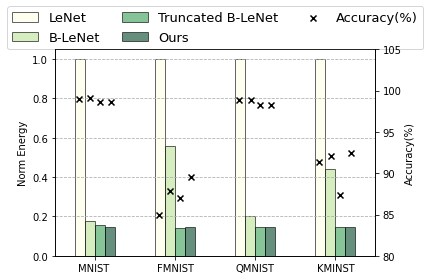

In [27]:
# raspberry pi

Branchynet =[ 0.266* 23.00081348,  0.267*72.48458767, 0.268*154.67515755, 0.265*56.82508731]
LBranchynet =[0.265*20.48959374  ,    0.265*18.74048877 ,0.267*112.3120935 ,0.264*19.04124212]
Lenet = [0.269*127.355534554, 0.266*130.057503939,0.267*760.110302925 ,0.267*128.145107508]
EncodeNet  =[ 0.269*18.76804352,0.266* 18.94773793 , 0.267*112.60272455 , 0.268*18.96781874]
LBranchynet = list(map(lambda x, y: x/y, LBranchynet, Lenet))
Ours = list(map(lambda x, y: x/y, EncodeNet, Lenet))
Branchynet = list(map(lambda x, y: x/y, Branchynet, Lenet))
Lenet = [1.0, 1.0,1., 1.]

print("EncodeNet to BranchyNet", list(map(lambda x, y: 1-x/y, EncodeNet, Branchynet)))
print("EncodeNet to Lenet", list(map(lambda x, y: 1-x/y, EncodeNet, Lenet)))

df = pd.DataFrame({'LeNet': Lenet,
                   'Truncated B-LeNet': LBranchynet, 
                   'B-LeNet': Branchynet,
                   'Ours': Ours}, 
                  index=['MNIST ', 'FMNIST','QMNIST','KMINST',])

suborder = ['LeNet', 'B-LeNet', 'Truncated B-LeNet', 'Ours']
df = df[suborder]

ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=False)
ax.set_ylim(0., 1.05, 0.05)
ax.grid(linestyle='dashed', axis='y')
ax.set_ylabel('Norm Energy')
#plt.xticks(rotation=15)
# function to add value labels
def addlabels1(x,y, shift=0, h=0):
    for i in range(len(x)):
        ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')
Branchynet2 =[ 99.12 ,     87.8 ,      98.89,      92.05]
LBranchynet2 =[98.58  ,    87.05 ,     98.24 ,     87.39]
Lenet =      [99.03,       84.9,       98.83,        91.4]
EncodeNet2  =[ 98.61 ,     89.59 ,     98.3 ,       92.5]
ax2=ax.twinx()
x = [0, 1, 2, 3]
x1 = list(map(lambda k: k-0.2, x))
x2 = list(map(lambda k: k-0.06, x))
x3 = list(map(lambda k: k+0.06, x))
x4 = list(map(lambda k: k+0.2, x))
ax2.scatter(x1, Lenet, marker="x", color='black')
ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
ax2.scatter(x4, EncodeNet2, marker="x", color='black')
ax2.set_ylim(80, 105, 5)
ax2.set_ylabel('Accuracy(%)')
x= [0,1, 2, 3]
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.6, box.height*0.2])
# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#addlabels1(x, LBranchynet, 0.06)
#addlabels1(x, Branchynet, -0.06)
#addlabels1(x, EncodeNet, 0.2)
#addlabels1(x, Lenet, -0.2)
ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=3, bbox_to_anchor=(-0.15, 1, 1.3, 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )
plt.tight_layout()
plt.savefig('Raspberry_server_energy.pdf') 
plt.show()

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def scale_figure_bar(acc_base, acc, timeBase, time_diff, file_name, scale=10):
    x = [i for  i in range(10)]
    index = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']
    df = pd.DataFrame({'B-LeNet': acc_base,
                   'EncodeNet': acc}, index=index)
    ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=True)
    ax.set_xlabel('The ratio of dataset size')
    ax.set_ylabel('Accuray(%)')
    ax.set_ylim(80, 100, 5)
    ax2=ax.twinx()
    ax2.scatter(list(map(lambda t: t-0.15, x)), timeBase, label ="B-LeNeT",marker="x", color='red')
    ax2.scatter(list(map(lambda t: t+0.15, x)), time_diff, label = "CB-LeNet", marker ="x", color='black')
    ax2.set_ylim(0, scale, 5)
    ax2.set_ylabel('Inference time(s)')
    # ask matplotlib for the plotted objects and their labels
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=2,
           bbox_to_anchor=(-0.05, 1.1, 1.2, 0.02),
          borderaxespad=0,
          mode='expand')
    #labels = [str(i)+'k' for i in range(1, 11, 1)]
    plt.xticks(x, index)
    plt.tight_layout()
    plt.savefig('scale_{0}.pdf'.format(file_name)) 
    plt.show()
def scale_figure(acc_base, acc, timeBase, time_diff, file_name, scale=10):
    x = [i for  i in range(10)]
    index = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']
    df = pd.DataFrame({'BranchyNet': acc_base,
                   'CBNet': acc}, index=index)
    ax = df.plot.line(rot=0, sort_columns=True)
    ax.set_xlabel('The ratio of dataset size')
    ax.set_ylabel('Accuray(%)')
    ax.set_ylim(80, 100, 5)
    ax.set_xlim(-0.3, 9.3, 1)
    ax2=ax.twinx()
    ax2.scatter(list(map(lambda t: t, x)), timeBase, label ="BranchyNet Time",marker="x", color='red')
    ax2.scatter(list(map(lambda t: t, x)), time_diff, label = "CBNet Time", marker ="x", color='black')
    ax2.set_ylim(0, scale, 5)
    ax2.set_ylabel('Inference time(s)')
    # ask matplotlib for the plotted objects and their labels
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()

    ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=2,
           bbox_to_anchor=(-0.05, 1.1, 1.2, 0.02),
          borderaxespad=0,
          mode='expand')

    #labels = [str(i)+'k' for i in range(1, 11, 1)]
    #labels = [str(i) for i in index]
    #plt.xticks(x, labels)
    plt.xticks(x, index)

    plt.tight_layout()
    plt.savefig('scale_{0}.pdf'.format(file_name)) 

    plt.show()

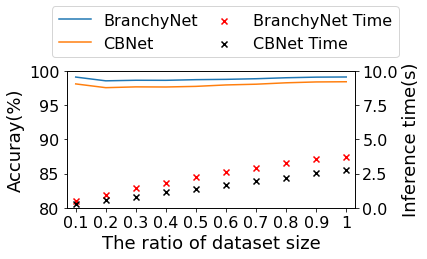

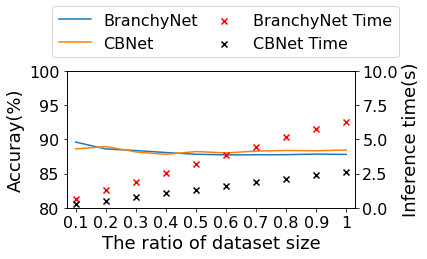

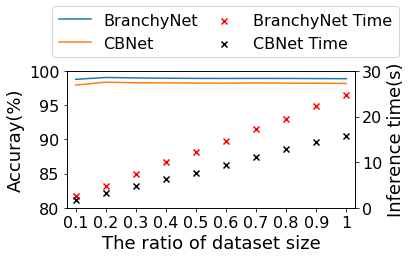

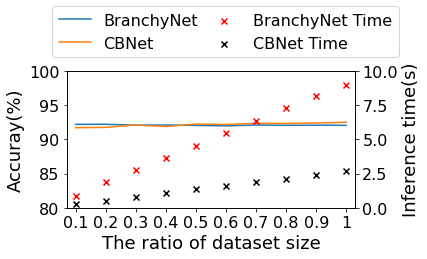

In [114]:
# google cloud without GPU
#MNIST scale analysis


#x = [i for  i in range(10)]

acc_base = [0.9910000000596046, 0.9854999995529652, 0.9863333327571551, 0.9862499994114041, 
0.9871999994933606, 0.9876666662196318, 0.9885714281754834, 0.989999999653548, 0.9908807826530043, 0.9911097484347086]
time_base = [0.5005784034729004, 0.9541563987731934, 1.4125041961669922, 1.8453655242919922, 2.2622077465057373, 2.587284803390503, 2.8773303031921387, 3.2495248317718506, 3.595517635345459, 3.7145283222198486]

acc=[0.980999995470047, 0.9754999953508378, 0.9766666622956593, 0.9764999957382678, 0.9773999959230423, 0.9794999964038531, 0.9805714251313891, 0.9826249969005585, 0.9838745519783998, 0.9841610434692183]
time_diff=[0.28600557645161945, 0.5475836594899496, 0.8148168722788492, 1.1177205244700115, 1.3814516067504883, 1.633747975031535, 1.9300244649251304, 2.2086716492970786, 2.534285386403402, 2.789410432179769]


acc_base = map(lambda t: t*100, acc_base)
acc = map(lambda t: t*100,acc)


scale_figure(acc_base, acc, time_base, time_diff, 'mnist')

#FMNIST scale analysis

acc_base = [0.8959999997466802, 0.8860000005587936, 0.8836666675955057, 0.8807500007040798, 0.8782000005573034, 0.8773333340113362, 0.8774285722013031, 0.8776250008307397, 0.8784444453020891, 0.8780000007763505]
time_base = [0.622800350189209, 1.2745585441589355, 1.9190571308135986, 2.5622355937957764, 3.1665639877319336, 3.825408697128296, 4.4490368366241455, 5.141561985015869, 5.77374529838562, 6.295896053314209]


acc = [0.8859999942779541, 0.8894999955594539, 0.8816666622956594, 0.8779999958723783, 0.8821999958157539, 0.8801666623353959, 0.8828571378333228, 0.8837499950453639, 0.8833333286643028, 0.8843999953866005]
time_diff = [0.2720801035563151, 0.5196533203125, 0.7841203212738037, 1.0521342754364014, 1.3091073036193848, 1.581283728281657, 1.8556867440541587, 2.09812593460083, 2.4088755448659263, 2.642832040786743]


acc_base = map(lambda t: t*100, acc_base)
acc = map(lambda t: t*100,acc)

scale_figure(acc_base, acc, time_base, time_diff, 'fmnist')


#Q-MNIST scale analysis
acc_base=[0.9876666662196318, 0.9904166664207975, 0.9897222218844626, 0.9892916663487752, 0.9890666662871838, 0.9889722218381034, 0.9890476186772188, 0.9889791662928958, 0.9887962959221116, 0.9886186039230297]
time_base=[2.6326823234558105, 4.797810316085815, 7.302421808242798, 10.012410163879395, 12.249442100524902, 14.696839332580566, 17.174224615097046, 19.473730087280273, 22.302681922912598, 24.682203769683838]



acc=[0.97933332969745, 0.9834999971091747, 0.9826111078924603, 0.9824999967465798, 0.9821666633089383, 0.9820833299391799, 0.9823333299585751, 0.9821041632443667, 0.9819629594683648, 0.9816538662522304]
time_diff=[1.604074239730835, 3.198097546895345, 4.868279218673706, 6.29232923189799, 7.725990056991577, 9.485697984695435, 11.156106551488241, 12.787546237309774, 14.38422703742981, 15.646580298741657]

acc_base = map(lambda t: t*100, acc_base)
acc = map(lambda t: t*100, acc)

scale_figure(acc_base, acc, time_base, time_diff, 'q_mnist', 30)

#KMNIST scale analysis

acc_base=[0.9220000015795231, 0.9220000016987324, 0.9206666682014862, 0.921000001501292, 0.9204000015944243, 0.9196666682586074, 0.9210000015646219, 0.9205000015776604, 0.9206666681170463, 0.9205000014811754]
time_base=[0.8911738395690918, 1.8595805168151855, 2.75462007522583, 3.672621250152588, 4.532291889190674, 5.428684711456299, 6.334796905517578, 7.317807912826538, 8.174136400222778, 8.933929920196533]

acc=[0.9169999915361404, 0.9174999934434891, 0.9209999930858612, 0.918749992698431, 0.9223999927043914, 0.9218333260218302, 0.9234285644122533, 0.923249992877245, 0.923888881749577, 0.924999928474427]
time_diff=[0.2790533701578776, 0.5318469206492106, 0.8058872222900391, 1.074917157491048, 1.3387978076934814, 1.6186764240264893, 1.8584593931833902, 2.1282742023468018, 2.4290225505828857, 2.7091304461161294]

acc_base = list(map(lambda t: t*100, acc_base))
acc = list(map(lambda t: t*100,acc))
scale_figure(acc_base, acc, time_base, time_diff, 'kmnist')

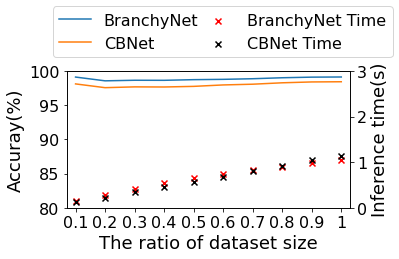

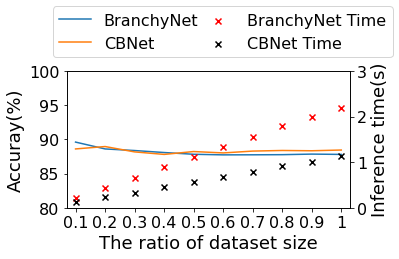

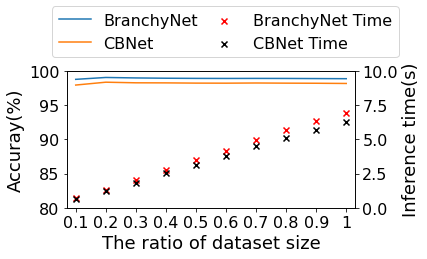

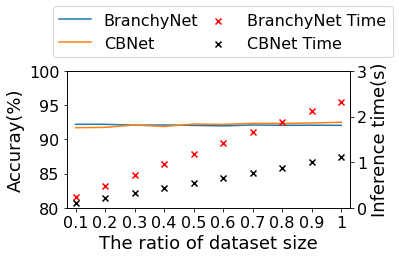

In [125]:
# google cloud with GPU
#MNIST scale analysis


#x = [i for  i in range(10)]

acc_base = [0.9910000000596046, 0.9854999995529652, 0.9863333327571551, 0.9862499994114041, 0.9871999994933606, 0.9876666662196318, 0.9885714281754834, 0.989999999653548, 0.9908807826530043, 0.9911097484347086]
time_base = [0.14534473419189453, 0.2763521671295166, 0.4072287082672119, 0.5361452102661133, 0.650749921798706, 0.744772434234619, 0.8181629180908203, 0.8933725357055664, 0.9843416213989258, 1.0380780696868896]

acc=[0.980999995470047, 0.9754999953508378, 0.9766666622956593, 0.9764999957382678, 0.9773999959230423, 0.9794999964038531, 0.9805714251313891, 0.9826249969005585, 0.9838745519783998, 0.9841610434692183]
time_diff=[0.1201952298482259, 0.22335426012674967, 0.3357044061024984, 0.4503211975097656, 0.5610968271891277, 0.6757570107777913, 0.8073057333628336, 0.9139374097188314, 1.0384689966837564, 1.143385966618856]


acc_base = list(map(lambda t: t*100, acc_base))
acc = list(map(lambda t: t*100,acc))


scale_figure(acc_base, acc, time_base, time_diff, 'GPU_mnist',3)

#FMNIST scale analysis

acc_base =[0.8959999997466802, 0.8860000005587936, 0.8836666675955057, 0.8807500007040798, 0.8782000005573034, 0.8773333340113362, 0.8774285722013031, 0.8776250008307397, 0.8784444453020891, 0.8780000007763505]
time_base = [0.16507506370544434, 0.3347318172454834, 0.5209507942199707, 0.6931445598602295, 0.8368480205535889, 1.0182764530181885, 1.1825027465820312, 1.366619348526001, 1.5348231792449951, 1.7123684883117674]
acc = [0.8859999942779541, 0.8894999955594539, 0.8816666622956594, 0.8779999958723783, 0.8821999958157539, 0.8801666623353959, 0.8828571378333228, 0.8837499950453639, 0.8833333286643028, 0.8843999953866005]
time_diff = [0.12680427233378094, 0.2283043066660563, 0.33519999186197913, 0.4549286365509033, 0.5584464867909749, 0.6735077699025471, 0.786566416422526, 0.9078102906545004, 1.0096500714619956, 1.145423412322998]

time_base=[0.22278451919555664, 0.4415318965911865, 0.6556193828582764, 0.8839256763458252, 1.1173295974731445, 1.3359205722808838, 1.5472302436828613, 1.7836778163909912, 1.9995992183685303, 2.1954352855682373]


acc_base = list(map(lambda t: t*100, acc_base))
acc = list(map(lambda t: t*100,acc))

scale_figure(acc_base, acc, time_base, time_diff, 'GPU_fmnist',3)


#Q-MNIST scale analysis

acc_base=[0.9876666662196318, 0.9904166664207975, 0.9897222218844626, 0.9892916663487752, 0.9890666662871838, 0.9889722218381034, 0.9890476186772188, 0.9889791662928958, 0.9887962959221116, 0.9886186039230297]
time_base=[0.7433724403381348, 1.312962293624878, 2.0514793395996094, 2.7884647846221924, 3.4848992824554443, 4.152810096740723, 4.985136270523071, 5.670003652572632, 6.364456415176392, 6.930105686187744]

acc=[0.97933332969745, 0.9834999971091747, 0.9826111078924603, 0.9824999967465798, 0.9821666633089383, 0.9820833299391799, 0.9823333299585751, 0.9821041632443667, 0.9819629594683648, 0.9816538662522304]
time_diff=[0.6216591993967693, 1.2614568869272866, 1.8331621487935386, 2.5306835174560547, 3.1470184326171875, 3.786060651143392, 4.489479700724283, 5.078322569529215, 5.67766777674357, 6.266261180241902]



acc_base = list(map(lambda t: t*100, acc_base))
acc = list(map(lambda t: t*100, acc))
scale_figure(acc_base, acc, time_base, time_diff, 'GPU_q_mnist',10)
#KMNIST scale analysis
acc_base=[0.9220000015795231, 0.9220000016987324, 0.9206666682014862, 0.921000001501292, 0.9204000015944243, 0.9196666682586074, 0.9210000015646219, 0.9205000015776604, 0.9206666681170463, 0.9205000014811754]
time_base=[0.23614954948425293, 0.4761989116668701, 0.7124783992767334, 0.9561429023742676, 1.1751534938812256, 1.420386552810669, 1.6594102382659912, 1.8829460144042969, 2.114802598953247, 2.3135862350463867]
acc=[0.9169999915361404, 0.9174999934434891, 0.9209999930858612, 0.918749992698431, 0.9223999927043914, 0.9218333260218302, 0.9234285644122533, 0.923249992877245, 0.923888881749577, 0.924999928474427]
time_diff=[0.11565486590067546, 0.21538917223612467, 0.31754207611083984, 0.43413599332173664, 0.5452522436777751, 0.6503888765970867, 0.7628249327341715, 0.8769006729125977, 1.0001428922017417, 1.1153806845347085]
acc_base = list(map(lambda t: t*100, acc_base))
acc = list(map(lambda t: t*100,acc))
scale_figure(acc_base, acc, time_base, time_diff, 'GPU_kmnist',3)

ValueError: x and y must be the same size

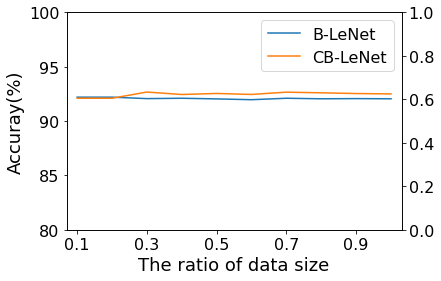

In [116]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes',edgecolor='black')


#x = [i for  i in range(10)]

a = [0.922, 0.922, 0.92066667, 0.921, 0.9204, 0.91966667, 0.921, 0.9205, 0.92066667, 0.9205]
timeBase=[5.62737346,11.36666441,17.14604235, 22.57430768, 28.11627173, 33.89490151, 39.47687864, 45.01039124, 50.5775156, 56.25311875]

b = [0.92099, 0.921, 0.9267, 0.92445, 0.9254, 0.9245, 0.9266, 0.92599, 0.92533333, 0.924999]
time1 = [1.92276907, 3.77757978, 5.72388101, 7.6482718, 9.5406518, 11.49961996, 13.26748157, 15.0654819, 16.92622256, 18.90596962]

a = map(lambda t: t*100, a)
b = map(lambda t: t*100, b)


index = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']

df = pd.DataFrame({'B-LeNet': a,
                   'CB-LeNet': b}, index=index)

#ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=True)
ax = df.plot.line(rot=0, sort_columns=True)



ax.set_xlabel('The ratio of data size')
ax.set_ylabel('Accuray(%)')
ax.set_ylim(80, 100, 5)
ax.set_xlim(-0.3, 9.3, 1)

ax2=ax.twinx()




ax2.scatter(list(map(lambda t: t, x)), time1,label ="B-LeNet Time", marker='x', color='red')
ax2.scatter(list(map(lambda t: t, x)), timeBase, label ="CB-Lenet Time",marker="x", color='black')

ax2.set_ylim(0, 60, 5)
ax2.set_ylabel('Inference time(s)')



# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=2,
           bbox_to_anchor=(-0.05, 1.1, 1.2, 0.02),
          borderaxespad=0,
          mode='expand')

#labels = [str(i)+'k' for i in range(1, 11, 1)]
labels = [str(i) for i in index]
plt.xticks(x, labels)

plt.tight_layout()
plt.savefig('Raspberrpi_scale_kmnist_updated.pdf') 

plt.show()

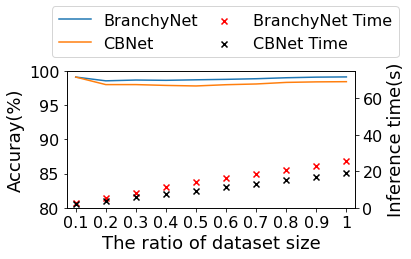

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes',edgecolor='black')



a = [0.991, 0.9855, 0.98666667,0.98625, 0.987,0.98766667, 0.98857143, 0.99, 0.99088078, 0.99121194]

#timeBase=[6.97134686,14.33127356,21.49846482,28.77396107,36.06793618, 43.21102858,50.48589683,57.71230745, 64.91640449, 72.33843088]
timeBase= [2.80963063, 5.61835599, 8.3452661,11.12223649,13.88928103,16.12519884,18.4726336,20.84323359,22.91006611, 25.41770117]


b = [0.99099, 0.97999, 0.980, 0.9788, 0.978, 0.97984, 0.9809, 0.9832, 0.98398, 0.9842634]
time1 = [1.90276146, 3.77669597,5.6606853,7.55970025, 9.44592381,11.36275363,13.27703381, 15.21568918, 17.04867436, 18.90919873]
a = list(map(lambda t: t*100, a))
b = list(map(lambda t: t*100, b))


index = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']
df = pd.DataFrame({'BranchyNet': a,
                   'CBNet': b}, index=index)

#ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=True)
ax = df.plot.line(rot=0, sort_columns=True)



ax.set_xlabel('The ratio of dataset size')
ax.set_ylabel('Accuray(%)')
ax.set_ylim(80, 100, 5)
ax.set_xlim(-0.3, 9.3, 1)

ax2=ax.twinx()



ax2.scatter(list(map(lambda t: t, x)), timeBase, label ="BranchyNet Time",marker="x", color='red')
ax2.scatter(list(map(lambda t: t, x)), time1,label ="CBNet Time", marker='x', color='black')

ax2.set_ylim(0, 75, 5)
ax2.set_ylabel('Inference time(s)')



# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=2,
           bbox_to_anchor=(-0.05, 1.1, 1.2, 0.02),
          borderaxespad=0,
          mode='expand')

#labels = [str(i)+'k' for i in range(1, 11, 1)]
labels = [str(i) for i in index]
plt.xticks(x, labels)

plt.tight_layout()
plt.savefig('Raspberrpi_scale_MNIST_updated.pdf') 

plt.show()

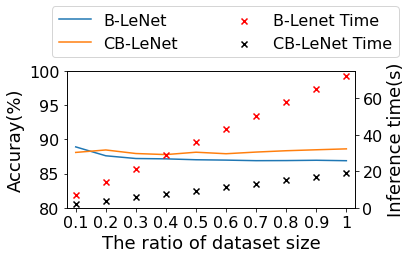

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes',edgecolor='black')


x = [i for  i in range(10)]

a = [0.889,0.876, 0.872, 0.8715, 0.8702, 0.86966667, 0.86885714, 0.869,0.86944444,0.8688]
timeBase=[6.97134686,14.33127356,21.49846482,28.77396107,36.06793618, 43.21102858,50.48589683,57.71230745, 64.91640449, 72.33843088]


b = [0.8809, 0.8845, 0.8793, 0.87775, 0.8812, 0.878999, 0.8814286, 0.883375, 0.88477778, 0.886099997]
time1 = [1.87201047, 3.77531958, 5.69332695, 7.53624868, 9.39891338, 11.30645847,13.13979053, 15.04456162, 16.92336202, 18.82498932]
a = list(map(lambda t: t*100, a))
b = list(map(lambda t: t*100, b))


index = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']
df = pd.DataFrame({'B-LeNet': a,
                   'CB-LeNet': b}, index=index)

#ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=True)
ax = df.plot.line(rot=0, sort_columns=True)



ax.set_xlabel('The ratio of dataset size')
ax.set_ylabel('Accuray(%)')
ax.set_ylim(80, 100, 5)
ax.set_xlim(-0.3, 9.3, 1)

ax2=ax.twinx()



ax2.scatter(list(map(lambda t: t, x)), timeBase, label ="B-Lenet Time",marker="x", color='red')
ax2.scatter(list(map(lambda t: t, x)), time1,label ="CB-LeNet Time", marker='x', color='black')

ax2.set_ylim(0, 75, 5)
ax2.set_ylabel('Inference time(s)')



# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=2,
           bbox_to_anchor=(-0.05, 1.1, 1.2, 0.02),
          borderaxespad=0,
          mode='expand')

#labels = [str(i)+'k' for i in range(1, 11, 1)]
labels = [str(i) for i in index]
plt.xticks(x, labels)

plt.tight_layout()
plt.savefig('Raspberrpi_scale_Fmnist_updated.pdf') 

plt.show()


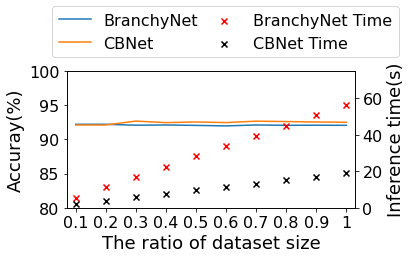

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes',edgecolor='black')




a = [0.922, 0.922, 0.92066667, 0.921, 0.9204, 0.91966667, 0.921, 0.9205, 0.92066667, 0.9205]
timeBase=[5.62737346,11.36666441,17.14604235, 22.57430768, 28.11627173, 33.89490151, 39.47687864, 45.01039124, 50.5775156, 56.25311875]

b = [0.92099, 0.921, 0.9267, 0.92445, 0.9254, 0.9245, 0.9266, 0.92599, 0.92533333, 0.924999]
time1 = [1.92276907, 3.77757978, 5.72388101, 7.6482718, 9.5406518, 11.49961996, 13.26748157, 15.0654819, 16.92622256, 18.90596962]



a = list(map(lambda t: t*100, a))
b = list(map(lambda t: t*100, b))


index = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']
df = pd.DataFrame({'BranchyNet': a,
                   'CBNet': b}, index=index)

#ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=True)
ax = df.plot.line(rot=0, sort_columns=True)



ax.set_xlabel('The ratio of dataset size')
ax.set_ylabel('Accuray(%)')
ax.set_ylim(80, 100, 5)
ax.set_xlim(-0.3, 9.3, 1)

ax2=ax.twinx()



ax2.scatter(list(map(lambda t: t, x)), timeBase, label ="BranchyNet Time",marker="x", color='red')
ax2.scatter(list(map(lambda t: t, x)), time1,label ="CBNet Time", marker='x', color='black')

ax2.set_ylim(0, 75, 5)
ax2.set_ylabel('Inference time(s)')



# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=2,
           bbox_to_anchor=(-0.05, 1.1, 1.2, 0.02),
          borderaxespad=0,
          mode='expand')
#labels = [str(i)+'k' for i in range(1, 11, 1)]
labels = [str(i) for i in index]
plt.xticks(x, labels)
plt.tight_layout()
plt.savefig('Raspberrpi_scale_kmnist_updated.pdf') 
plt.show()

In [79]:
127.35/1.8

70.75

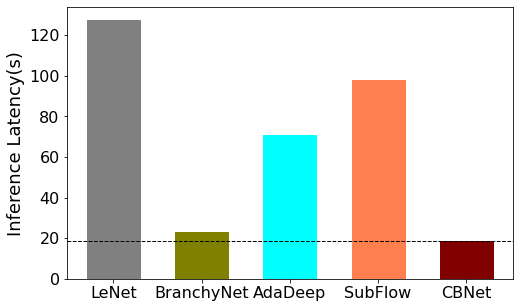

In [172]:
import numpy as np
import matplotlib.pyplot as plt 
 
  
# creating the dataset
data = {'LeNet':127.5, 'BranchyNet':23, 'AdaDeep':70.75,'SubFlow': 97.96, 
        'CBNet':18.77}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
ax = plt.bar(courses, values, 
        width = 0.6)

ax[0].set_color('gray')
ax[1].set_color('olive')
ax[2].set_color('cyan')
ax[3].set_color('coral')
ax[4].set_color('maroon')
plt.axhline(y=18.77,linewidth=1, color='k',linestyle='--')
#plt.xlabel("Different Frameworks")
plt.ylabel("Inference Latency(s)")
#plt.title("Performance of Different Framewo")
plt.show()

fig.savefig("Inference_latency_comparison.png")

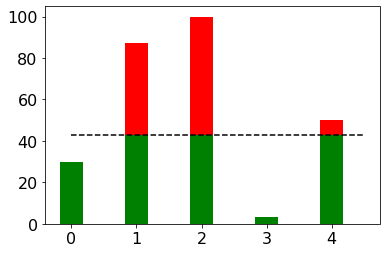

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# some example data
threshold = 43.0
values = np.array([30., 87.3, 99.9, 3.33, 50.0])
x = range(len(values))

# split it up
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = plt.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)

# horizontal line indicating the threshold
ax.plot([0., 4.5], [threshold, threshold], "k--")

fig.savefig("look-ma_a-threshold-plot.png")

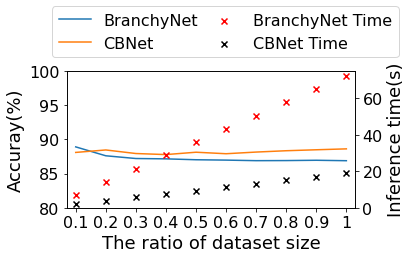

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes',edgecolor='black')


x = [i for  i in range(10)]

a = [0.889,0.876, 0.872, 0.8715, 0.8702, 0.86966667, 0.86885714, 0.869,0.86944444,0.8688]
timeBase=[6.97134686,14.33127356,21.49846482,28.77396107,36.06793618, 43.21102858,50.48589683,57.71230745, 64.91640449, 72.33843088]


b = [0.8809, 0.8845, 0.8793, 0.87775, 0.8812, 0.878999, 0.8814286, 0.883375, 0.88477778, 0.886099997]
time1 = [1.87201047, 3.77531958, 5.69332695, 7.53624868, 9.39891338, 11.30645847,13.13979053, 15.04456162, 16.92336202, 18.82498932]
a = list(map(lambda t: t*100, a))
b = list(map(lambda t: t*100, b))


index = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']
df = pd.DataFrame({'BranchyNet': a,
                   'CBNet': b}, index=index)

#ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=True)
ax = df.plot.line(rot=0, sort_columns=True)



ax.set_xlabel('The ratio of dataset size')
ax.set_ylabel('Accuray(%)')
ax.set_ylim(80, 100, 5)
ax.set_xlim(-0.3, 9.3, 1)

ax2=ax.twinx()



ax2.scatter(list(map(lambda t: t, x)), timeBase, label ="BranchyNet Time",marker="x", color='red')
ax2.scatter(list(map(lambda t: t, x)), time1,label ="CBNet Time", marker='x', color='black')

ax2.set_ylim(0, 75, 5)
ax2.set_ylabel('Inference time(s)')



# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=2,
           bbox_to_anchor=(-0.05, 1.1, 1.2, 0.02),
          borderaxespad=0,
          mode='expand')

#labels = [str(i)+'k' for i in range(1, 11, 1)]
labels = [str(i) for i in index]
plt.xticks(x, labels)

plt.tight_layout()
plt.savefig('Raspberrpi_scale_Fmnist_updated.pdf') 

plt.show()

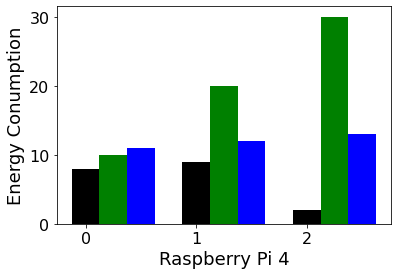

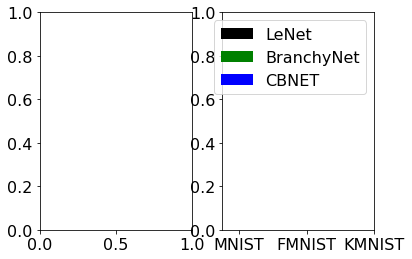

In [144]:
import numpy as np 
import matplotlib.pyplot as plt 
  
N = 3
ind = np.arange(N)  
width = 0.25
  
Raspberry_Pi = [8, 9, 2] 
bar1 = plt.bar(ind, Raspberry_Pi, width, color = 'k') 
  
GCI_wo_GPU = [10, 20, 30] 
bar2 = plt.bar(ind+width, GCI_wo_GPU, width, color='g') 
  
GCI_with_GPU = [11, 12, 13] 
bar3 = plt.bar(ind+width*2, GCI_with_GPU, width, color = 'b') 
  
plt.xlabel("Raspberry Pi 4") 
plt.ylabel('Energy Conumption') 
#plt.title("MNIST") 
fig, ax = plt.subplots(nrows=1, ncols=2) 


plt.xticks(ind+width,['MNIST', 'FMNIST', 'KMNIST']) 
plt.legend( (bar1, bar2, bar3), ('LeNet', 'BranchyNet', 'CBNET')) 
plt.show() 

TypeError: 'AxesSubplot' object is not subscriptable

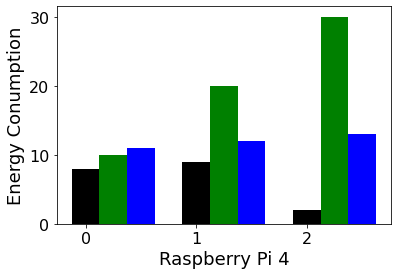

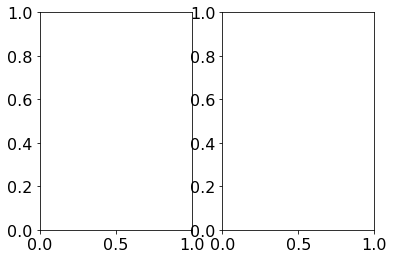

In [147]:
import numpy as np 
import matplotlib.pyplot as plt 
  
N = 3
ind = np.arange(N)  
width = 0.25
  
Raspberry_Pi = [8, 9, 2] 
bar1 = plt.bar(ind, Raspberry_Pi, width, color = 'k') 
  
GCI_wo_GPU = [10, 20, 30] 
bar2 = plt.bar(ind+width, GCI_wo_GPU, width, color='g') 
  
GCI_with_GPU = [11, 12, 13] 
bar3 = plt.bar(ind+width*2, GCI_with_GPU, width, color = 'b') 
  
plt.xlabel("Raspberry Pi 4") 
plt.ylabel('Energy Conumption') 
#plt.title("MNIST") 
fig, ax = plt.subplots(nrows=1, ncols=2) 
ax[0,0].

plt.xticks(ind+width,['MNIST', 'FMNIST', 'KMNIST']) 
plt.legend( (bar1, bar2, bar3), ('LeNet', 'BranchyNet', 'CBNET')) 
plt.show() 

In [ ]:
ax[i][j].imshow(x_train[k], aspect='auto')

In [1]:
# import matplotlib.pyplot as plt
# import pandas as pd
 
# # Create a DataFrame with random categorical data
# data = {'Category': ['A', 'B', 'C', 'D'],
#         'Value1': np.random.randint(1, 10, 4),
#         'Value2': np.random.randint(1, 10, 4),
#         'Value3': np.random.randint(1, 10, 4)}
 
# df = pd.DataFrame(data)
 
# # Create subplots with bar plots
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
 
# df.plot(kind='bar', x='Category', y='Value1', color='skyblue', ax=axes[0])
# df.plot(kind='bar', x='Category', y='Value2', color='lightgreen', ax=axes[1])
# df.plot(kind='bar', x='Category', y='Value3', color='coral', ax=axes[2])
 
# # Add titles
# axes[0].set_title('Value1 Distribution')
# axes[1].set_title('Value2 Distribution')
# axes[2].set_title('Value3 Distribution')
 
# # Adjust layout for better spacing
# plt.tight_layout()
 
# # Display the figure
# plt.show()

EncodeNet to BranchyNet [-27.26939746983271, -8.009467504565349, -10.549933675656085]
EncodeNet to Lenet [-4.04860370688, -4.04009828938, -4.08337542232]


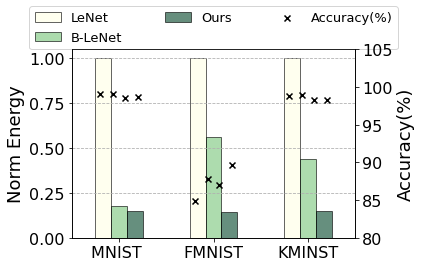

In [153]:
Branchynet =[ 0.266* 23.00081348,  0.267*72.48458767, 0.265*56.82508731]
#LBranchynet =[0.265*20.48959374  ,    0.265*18.74048877 ,0.267*112.3120935 ,0.264*19.04124212]
Lenet = [0.269*127.355534554, 0.266*130.057503939,0.267*128.145107508]
EncodeNet  =[ 0.269*18.76804352,0.266* 18.94773793 , 0.268*18.96781874]



#LBranchynet = list(map(lambda x, y: x/y, LBranchynet, Lenet))
Ours = list(map(lambda x, y: x/y, EncodeNet, Lenet))
Branchynet = list(map(lambda x, y: x/y, Branchynet, Lenet))
Lenet = [1.0, 1.0, 1.]

print("EncodeNet to BranchyNet", list(map(lambda x, y: 1-x/y, EncodeNet, Branchynet)))
print("EncodeNet to Lenet", list(map(lambda x, y: 1-x/y, EncodeNet, Lenet)))

df = pd.DataFrame({'LeNet': Lenet, 
                   'B-LeNet': Branchynet,
                   'Ours': Ours}, 
                  index=['MNIST ', 'FMNIST','KMINST',])

suborder = ['LeNet', 'B-LeNet',  'Ours']
df = df[suborder]

ax = df.plot.bar(rot=0, colormap='YlGn', edgecolor='black',alpha=0.6, sort_columns=False)
ax.set_ylim(0., 1.05, 0.05)
ax.grid(linestyle='dashed', axis='y')
ax.set_ylabel('Norm Energy')
#plt.xticks(rotation=15)

# function to add value labels
def addlabels1(x,y, shift=0, h=0):
    for i in range(len(x)):
        ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')
        


Branchynet2 =[ 99.12 ,     87.8 ,      98.89,      92.05]
#LBranchynet2 =[98.58  ,    87.05 ,     98.24 ,     87.39]
Lenet =      [99.03,       84.9,       98.83,        91.4]
EncodeNet2  =[ 98.61 ,     89.59 ,     98.3 ,       92.5]


ax2=ax.twinx()
x = [0, 1, 2, 3]
x1 = list(map(lambda k: k-0.2, x))
x2 = list(map(lambda k: k-0.06, x))
x3 = list(map(lambda k: k+0.06, x))
x4 = list(map(lambda k: k+0.2, x))

ax2.scatter(x1, Lenet, marker="x", color='black')
ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
ax2.scatter(x4, EncodeNet2, marker="x", color='black')


ax2.set_ylim(80, 105, 5)
ax2.set_ylabel('Accuracy(%)')


x= [0,1, 2, 3]


#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.6, box.height*0.2])

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

#addlabels1(x, LBranchynet, 0.06)
#addlabels1(x, Branchynet, -0.06)
#addlabels1(x, EncodeNet, 0.2)
#addlabels1(x, Lenet, -0.2)

ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=3, bbox_to_anchor=(-0.15, 1, 1.3, 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )

plt.tight_layout()
plt.savefig('Raspberry_server_energy_new.pdf') 
plt.show()

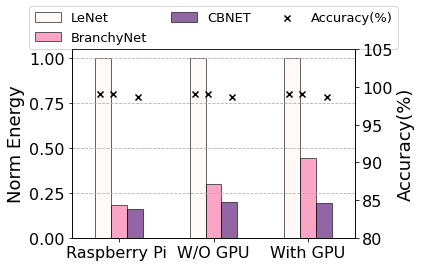

In [165]:
EncodeNet_data=[0.16088498871882329, 0.19678048506174647,  0.19173662629847057]
BranchyNet_data=[0.18060317174710167, 0.29878971255673226, 0.4428974600188147]
#LBranchyNet_data=[0.14736731768843672, 0.14750378214826024, 0.13358419567262464]
LeNet_data=[1.0, 1.0, 1.0]

df = pd.DataFrame({
                   'LeNet': LeNet_data,
                   'BranchyNet': BranchyNet_data,
                   'CBNET': EncodeNet_data, 
                  }, 
                  index=['Raspberry Pi ', 'W/O GPU','With GPU'])
suborder = ['LeNet', 'BranchyNet', 'CBNET']
df = df[suborder]


ax = df.plot.bar(rot=0, colormap='RdPu', edgecolor='black',alpha=0.6, sort_columns=False)
ax.set_ylim(0., 1.05, 0.05)
ax.grid(linestyle='dashed', axis='y')
ax.set_ylabel('Norm Energy')
#plt.xticks(rotation=15)

# function to add value labels
def addlabels1(x,y, shift=0, h=0):
    for i in range(len(x)):
        ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')
        
#addlabels1(Branchynet, LBranchynet, -0.05)
#addlabels1(Branchynet, AutoLBranchynet, 0.22, 0.02)
#addlabels1(Branchynet, Branchynet, -0.2)

Branchynet2 =[ 99.12 ] *3
#LBranchynet2 =[98.58 ] * 3
Lenet =      [99.03] * 3
EncodeNet2  =[ 98.61 ] * 3

ax2=ax.twinx()
x = [0, 1, 2]
x1 = list(map(lambda k: k-0.2, x))
x2 = list(map(lambda k: k-0.06, x))
#x3 = list(map(lambda k: k+0.06, x))
x4 = list(map(lambda k: k+0.2, x))


ax2.scatter(x1, Lenet, marker="x", color='black')
ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
#ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
ax2.scatter(x4, EncodeNet2, marker="x", color='black')


ax2.set_ylim(80, 105, 5)
ax2.set_ylabel('Accuracy(%)')


x= [0,1, 2, 3]


#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.6, box.height*0.2])

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()



ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=3, bbox_to_anchor=(-0.15, 1, 1.3, 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )

plt.tight_layout()
plt.savefig('evaluation_mnist_energy_new_2.pdf') 
plt.show()

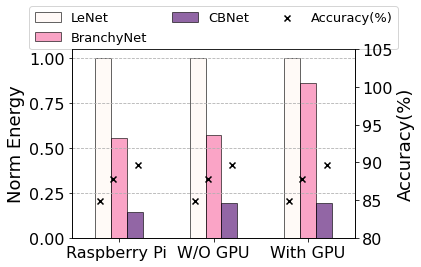

In [167]:
#Fmnist 
EncodeNet_data=[0.14409386773092098, 0.19506483860135648,  0.19215906559615697]
BranchyNet_data=[0.557327224302236, 0.5715355805243446, 0.8607498087222647]
#LBranchyNet_data=[0.14568738716442636, 0.14531835205992508, 0.1331293037490436]
LeNet_data=[1.0, 1.0, 1.0]

df = pd.DataFrame({'LeNet': LeNet_data,
                   'BranchyNet': BranchyNet_data,
                   'CBNet': EncodeNet_data, 
                  }, 
                  index=['Raspberry Pi ', 'W/O GPU','With GPU'])
suborder = ['LeNet', 'BranchyNet', 'CBNet']
df = df[suborder]


ax = df.plot.bar(rot=0, colormap='RdPu', edgecolor='black',alpha=0.6, sort_columns=False)
ax.set_ylim(0., 1.05, 0.05)
ax.grid(linestyle='dashed', axis='y')
ax.set_ylabel('Norm Energy')
#plt.xticks(rotation=15)

# function to add value labels
def addlabels1(x,y, shift=0, h=0):
    for i in range(len(x)):
        ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')
        
#addlabels1(Branchynet, LBranchynet, -0.05)
#addlabels1(Branchynet, AutoLBranchynet, 0.22, 0.02)
#addlabels1(Branchynet, Branchynet, -0.2)


Branchynet2 =[     87.8 ] *3
#LBranchynet2 =[   87.05] * 3
Lenet =      [     84.9] * 3
EncodeNet2  =[     89.59] * 3

#Branchynet2 =[     87.8 ,      98.89,      92.05] *3
#LBranchynet2 =[   87.05 ,     98.24 ,     87.39] * 3
#Lenet =      [     84.9,       98.83,        91.4] * 3
#EncodeNet2  =[     89.59 ,     98.3 ,       92.5] * 3


ax2=ax.twinx()
x = [0, 1, 2]
x1 = list(map(lambda k: k-0.2, x))
x2 = list(map(lambda k: k-0.06, x))
#x3 = list(map(lambda k: k+0.06, x))
x4 = list(map(lambda k: k+0.2, x))


ax2.scatter(x1, Lenet, marker="x", color='black')
ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
#ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
ax2.scatter(x4, EncodeNet2, marker="x", color='black')


ax2.set_ylim(80, 105, 5)
ax2.set_ylabel('Accuracy(%)')


x= [0,1, 2, 3]


#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.6, box.height*0.2])

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()



ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=3, bbox_to_anchor=(-0.15, 1, 1.3, 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )

plt.tight_layout()
plt.savefig('evaluation_f_mnist_energy_new_2.pdf') 
plt.show()

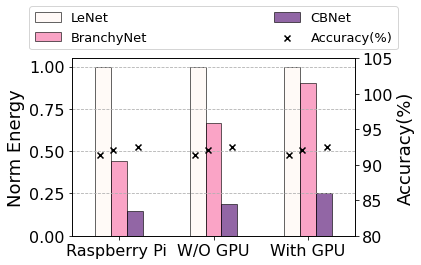

In [397]:
#kmnist 
EncodeNet_data=[0.14859125323072728, 0.1886359782032497,  0.18768250935435077]
BranchyNet_data=[0.4434432840633612, 0.6666666666666666, 0.9056603773584906]
#LBranchyNet_data=[0.1480182826239843, 0.1451851851851852, 0.1328301886792453]

EncodeNet_data=[0.14859125323072728, 0.1886359782032497,  0.25320055904961564]


LeNet_data=[1.0, 1.0, 1.0]

df = pd.DataFrame({'LeNet': LeNet_data,
                   'BranchyNet': BranchyNet_data,
                   'CBNet': EncodeNet_data, 
                  }, 
                  index=['Raspberry Pi ', 'W/O GPU','With GPU'])
suborder = ['LeNet', 'BranchyNet', 'CBNet']
df = df[suborder]


ax = df.plot.bar(rot=0, colormap='RdPu', edgecolor='black',alpha=0.6, sort_columns=False)
ax.set_ylim(0., 1.05, 0.05)
ax.grid(linestyle='dashed', axis='y')
ax.set_ylabel('Norm Energy')
#ax.set_xlabel('datasets')
#plt.xticks(rotation=15)


# function to add value labels
def addlabels1(x,y, shift=0, h=0):
    for i in range(len(x)):
        ax.text(i+shift, y[i]+0.01+h,  round(y[i],2), ha = 'center')
        
#addlabels1(Branchynet, LBranchynet, -0.05)
#addlabels1(Branchynet, AutoLBranchynet, 0.22, 0.02)
#addlabels1(Branchynet, Branchynet, -0.2)


Branchynet2 =[         92.05] *3
#LBranchynet2 =[     87.39] * 3
Lenet =      [         91.4] * 3
EncodeNet2  =[      92.5] * 3


ax2=ax.twinx()
x = [0, 1, 2]
x1 = list(map(lambda k: k-0.2, x))
x2 = list(map(lambda k: k-0.06, x))
#x3 = list(map(lambda k: k+0.06, x))
x4 = list(map(lambda k: k+0.2, x))


ax2.scatter(x1, Lenet, marker="x", color='black')
ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
#ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
ax2.scatter(x4, EncodeNet2, marker="x", color='black')


ax2.set_ylim(80, 105, 5)
ax2.set_ylabel('Accuracy(%)')


x= [0,1, 2, 3]


#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.6, box.height*0.2])

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()



ax.legend(lines + lines2, labels + labels2, loc='lower left', ncol=2, bbox_to_anchor=(-0.15, 1.05, 1.3, 0.5),
          borderaxespad=0,
          mode='expand', prop={'size': 13} )

plt.tight_layout()
plt.savefig('evaluation_k_mnist_energy_new_2.pdf') 
plt.show()

/tmp/ipykernel_3228432/12397696.py:37: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(courses,accuracies, c ="maroon",


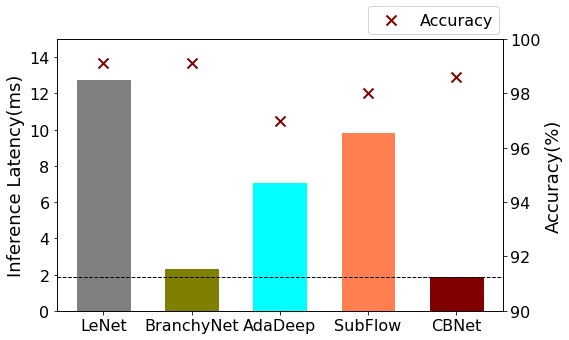

In [300]:
import numpy as np
import matplotlib.pyplot as plt 
 
  
# creating the dataset
data = {'LeNet':127.5/10, 'BranchyNet':23/10, 'AdaDeep':70.75/10,'SubFlow': 97.96/10, 
        'CBNet':18.77/10}
courses = list(data.keys())
values = list(data.values())
  
fig,ax1 = plt.subplots(figsize = (8, 5))
 
# creating the bar plot
ax = plt.bar(courses, values, 
        width = 0.6)

ax[0].set_color('gray')
ax[1].set_color('olive')
ax[2].set_color('cyan')
ax[3].set_color('coral')
ax[4].set_color('maroon')
plt.axhline(y=1.877,linewidth=1, color='k',linestyle='--')
plt.ylabel("Inference Latency(ms)")
ax1.set_ylim(0, 15, 0.5)

LeNet = 99.11
BranchyNet =  99.11    
Adadeep  = 97.00
Subflow  = 98
CBNet  =   98.61
accuracies = [99.11,99.11,97.00,98,98.61]
ax2= ax1.twinx()
ax2.set_ylabel('Accuracy(%)')
ax2.set_ylim(90, 100, 5)
#plt.xlabel("Different Frameworks")

ax2.scatter(courses,accuracies, c ="maroon",
            linewidths = 2,
            marker ="x",
            edgecolor ="green", s = 100)
#ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
#ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
#ax2.scatter(x4, EncodeNet2, marker="x", color='black')
lines2, labels2 = ax2.get_legend_handles_labels()
#plt.legend(['accuracy'])
plt.legend(['Accuracy'] ,bbox_to_anchor=(1.01, 1.15))
#plt.title("Performance of Different Framewo")
plt.show()

fig.savefig("Inference_latency_comparison.pdf")

In [199]:
18.77/10000

0.001877

In [ ]:
rasp_auto = [3.67, 0.72, 0.7]
rasp_bnet = [15.095, 1.95, 0.353]

In [212]:
(0.7+0.353)

1.053

In [218]:
13.006/7.248

1.7944260485651213

In [ ]:
For raspberry pi:--- 
    
For MNIST datasets,
LeNet= 1 x 
BranchyNet= 5.5 x
CBNet= 6.72 x
AdaDeep = 1.8 x
SubFlow = 1.4I x

For FMNIST datsets,

BranchyNet = 1.7944








In [229]:
datasets=['MNIST','FMNIST','QMNIST','KMNIST']

In [230]:
### Raspberry pi
#LBranchyNet =     [20.48959374 , 18.74048877  , 112.3120935 , 19.04124212]
BranchyNet =      [23.00081348, 72.48458767 ,154.67515755 ,56.82508731]
EncodeNet  =[ 18.76804352,18.94773793  ,112.60272455 ,18.96781874]
LeNet = [127.355534554,130.057503939  ,760.110302925 ,128.145107508]




In [235]:
for idx in range(4):
    print(str(datasets[idx])+"    "+"On Raspberry pi4")
    print('Relative speed up achived by CBNET')
    print('for LeNet   :--->', LeNet[idx]/EncodeNet[idx])
    print('for BranchyNet   :--->', BranchyNet[idx]/EncodeNet[idx])
    
    
    

MNIST    On Raspberry pi4
Relative speed up achived by CBNET
for LeNet   :---> 6.78576509151232
for BranchyNet   :---> 1.2255306982578866
FMNIST    On Raspberry pi4
Relative speed up achived by CBNET
for LeNet   :---> 6.8640121802127965
for BranchyNet   :---> 3.8255008559747377
QMNIST    On Raspberry pi4
Relative speed up achived by CBNET
for LeNet   :---> 6.750372213129545
for BranchyNet   :---> 1.373636012522221
KMNIST    On Raspberry pi4
Relative speed up achived by CBNET
for LeNet   :---> 6.755922189290175
for BranchyNet   :---> 2.995868322495368


In [219]:
23/18

1.2777777777777777

In [222]:
127.355534554/1.8

70.75307475222222

In [223]:
70.75/18.76

3.771321961620469

/tmp/ipykernel_3228432/963321459.py:36: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(courses,accuracies, c ="k",


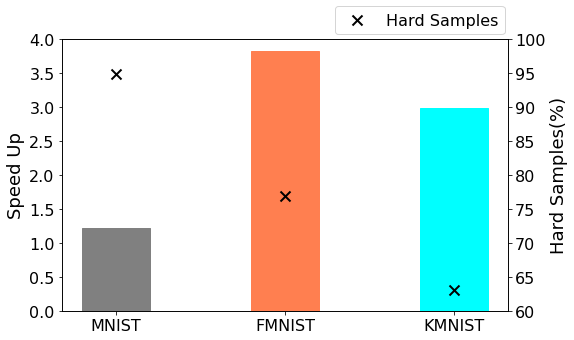

In [270]:
import numpy as np
import matplotlib.pyplot as plt 
 
  
# creating the dataset
data = {'MNIST':1.22, 'FMNIST':3.82, 'KMNIST':2.99}
courses = list(data.keys())
values = list(data.values())
  
fig,ax1 = plt.subplots(figsize = (8, 5))
 
# creating the bar plot
ax = plt.bar(courses, values, 
        width = 0.4)

ax[0].set_color('gray')
ax[1].set_color('coral')
ax[2].set_color('cyan')
#ax[3].set_color('coral')
#ax[4].set_color('maroon')
#plt.axhline(y=1.877,linewidth=1, color='k',linestyle='--')
plt.ylabel("Speed Up")
ax1.set_ylim(0, 4, 0.5)
ax1.set_(0, 4, 0.5)

LeNet = 99.11
BranchyNet =  99.11    
Adadeep  = 97.00
Subflow  = 98
CBNet  =   98.61
accuracies = [94.88,76.91,63.08]
ax2= ax1.twinx()
ax2.set_ylabel('Hard Samples(%)')
ax2.set_ylim(60, 100, 10)
#plt.xlabel("Different Frameworks")

ax2.scatter(courses,accuracies, c ="k",
            linewidths = 2,
            marker ="x",
            edgecolor ="green", s = 100)
#ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
#ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
#ax2.scatter(x4, EncodeNet2, marker="x", color='black')
lines2, labels2 = ax2.get_legend_handles_labels()
#plt.legend(['accuracy'])
plt.legend(['Hard Samples'] ,bbox_to_anchor=(1.01, 1.15))
#plt.title("Performance of Different Framewo")
plt.show()

fig.savefig("Relative_speedup_CBNetvsBranchyNet.pdf")

/tmp/ipykernel_3228432/1497062305.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([ str(y) + "X" for y in speeduplist])
/tmp/ipykernel_3228432/1497062305.py:42: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(courses,accuracies, c ="r",


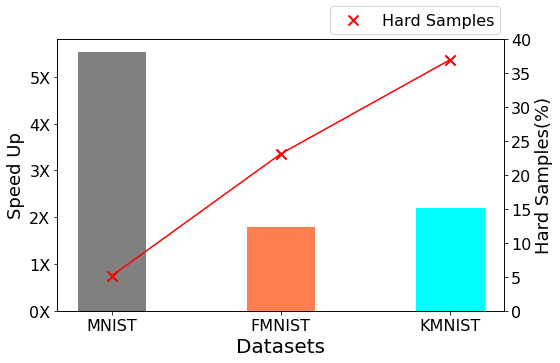

In [304]:
import numpy as np
import matplotlib.pyplot as plt 
 
  
# creating the dataset
data = {'MNIST':5.53, 'FMNIST':1.79, 'KMNIST':2.20}
courses = list(data.keys())
values = list(data.values())
  
fig,ax1 = plt.subplots(figsize = (8, 5))
 
# creating the bar plot
ax = plt.bar(courses, values, 
        width = 0.4)

ax[0].set_color('gray')
ax[1].set_color('coral')
ax[2].set_color('cyan')
#ax[3].set_color('coral')
#ax[4].set_color('maroon')
#plt.axhline(y=1.877,linewidth=1, color='k',linestyle='--')
plt.ylabel("Speed Up")
#y_lims=['0X','1X','2X','3X']
speeduplist=[0,1,2,3,4,5,6]
ax1.set_yticklabels([ str(y) + "X" for y in speeduplist])

#ax1.set_ylim(0, 6, 0.5)
#ax1.set_ylim(y_lims)

LeNet = 99.11
BranchyNet =  99.11    
Adadeep  = 97.00
Subflow  = 98
CBNet  =   98.61
accuracies = [5.12,23.09,36.92]
ax2= ax1.twinx()
ax2.set_ylabel('Hard Samples(%)')
ax2.set_ylim(0, 40, 10)
#plt.xlabel("Different Frameworks")
ax1.set_xlabel('Datasets', fontsize=20)

ax2.scatter(courses,accuracies, c ="r",
            linewidths = 2,
            marker ="x",
            edgecolor ="green", s = 100)

#for i, txt in enumerate(n):
#    ax2.annotate(txt, (x[i], y[i]))
#ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
#ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
#ax2.scatter(x4, EncodeNet2, marker="x", color='black')
lines2, labels2 = ax2.get_legend_handles_labels()
#plt.legend(['accuracy'])
plt.legend(['Hard Samples'] ,bbox_to_anchor=(1.01, 1.15))
plt.plot(courses, accuracies, marker = 'x', markersize = 10,color='r')
#plt.title("Performance of Different Framewo")
#plt.xlabel("Average Pulse")
plt.show()

fig.savefig("Relative_speedup_LeNetvsBranchyNet.pdf")

In [ ]:
ax.set_yticklabels([ str(y) + "X" for y in speeduplist])

/tmp/ipykernel_3228432/719316703.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([ str(y) + "X" for y in speeduplist])
/tmp/ipykernel_3228432/719316703.py:42: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(courses,accuracies, c ="r",


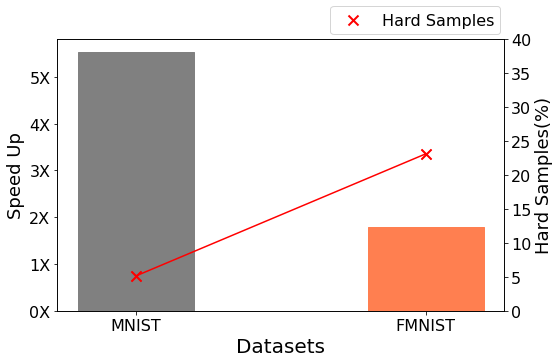

In [306]:
import numpy as np
import matplotlib.pyplot as plt 
 
  
# creating the dataset
data = {'MNIST':5.53, 'FMNIST':1.79}
courses = list(data.keys())
values = list(data.values())
  
fig,ax1 = plt.subplots(figsize = (8, 5))
 
# creating the bar plot
ax = plt.bar(courses, values, 
        width = 0.4)

ax[0].set_color('gray')
ax[1].set_color('coral')
#ax[2].set_color('cyan')
#ax[3].set_color('coral')
#ax[4].set_color('maroon')
#plt.axhline(y=1.877,linewidth=1, color='k',linestyle='--')
plt.ylabel("Speed Up")
#y_lims=['0X','1X','2X','3X']
speeduplist=[0,1,2,3,4,5,6]
ax1.set_yticklabels([ str(y) + "X" for y in speeduplist])

#ax1.set_ylim(0, 6, 0.5)
#ax1.set_ylim(y_lims)

LeNet = 99.11
BranchyNet =  99.11    
Adadeep  = 97.00
Subflow  = 98
CBNet  =   98.61
accuracies = [5.12,23.09]
ax2= ax1.twinx()
ax2.set_ylabel('Hard Samples(%)')
ax2.set_ylim(0, 40, 10)
#plt.xlabel("Different Frameworks")
ax1.set_xlabel('Datasets', fontsize=20)

ax2.scatter(courses,accuracies, c ="r",
            linewidths = 2,
            marker ="x",
            edgecolor ="green", s = 100)

#for i, txt in enumerate(n):
#    ax2.annotate(txt, (x[i], y[i]))
#ax2.scatter(x2, Branchynet2, label ="Accuracy(%)",marker="x", color='black')
#ax2.scatter(x3, LBranchynet2, color='black', marker="x", )
#ax2.scatter(x4, EncodeNet2, marker="x", color='black')
lines2, labels2 = ax2.get_legend_handles_labels()
#plt.legend(['accuracy'])
plt.legend(['Hard Samples'] ,bbox_to_anchor=(1.01, 1.15))
plt.plot(courses, accuracies, marker = 'x', markersize = 10,color='r')
#plt.title("Performance of Different Framewo")
#plt.xlabel("Average Pulse")
plt.show()

fig.savefig("Relative_speedup_LeNetvsBranchyNet_v2.pdf")

/tmp/ipykernel_3228432/2187659440.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([str(y)+"X" for y in speeduplist])


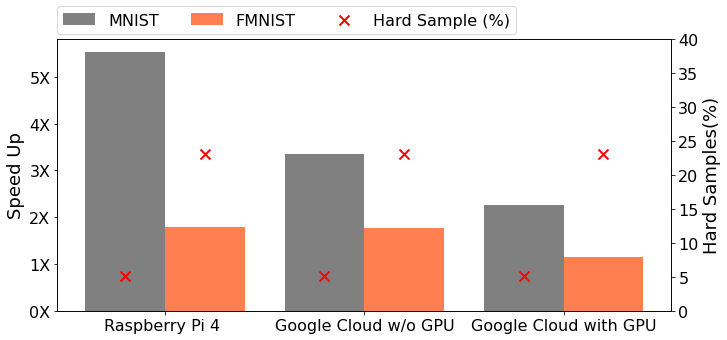

In [405]:
import numpy as np  
import matplotlib.pyplot as plt  
fig,ax1 = plt.subplots(figsize = (11, 5))
X = ['Raspberry Pi 4 ','Google Cloud w/o GPU','Google Cloud with GPU'] 
MNIST = [5.53,3.34,2.254] 
FMNIST = [1.79,1.77,1.16] 
X_axis = np.arange(len(X)) 
plt.bar(X_axis - 0.2, MNIST, 0.4, label = 'MNIST',color= 'gray') 
plt.bar(X_axis + 0.2, FMNIST, 0.4, label = 'FMNIST',color='coral') 
#ax1.set_xlabel("Devices",fontsize=22) 
ax1.set_ylabel("Speed Up")
speeduplist=[0,1,2,3,4,5,6,7,8]
ax1.set_yticklabels([str(y)+"X" for y in speeduplist])
ax2= ax1.twinx()
ax2.set_ylabel('Hard Samples(%)')
ax2.set_ylim(0, 40, 10)
samples_mnist = [5.12]*3
samples_fmnist = [23.09]*3
ax2.scatter(X_axis-0.2,samples_mnist, c ="r",
            linewidths = 2,
            marker ="x", s = 100, label='Hard Sample (%)')
ax2.scatter(X_axis+0.2,samples_fmnist, c ="r",
            linewidths = 2,
            marker ="x", s = 100)
plt.xticks(X_axis, X)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, ncol=3, bbox_to_anchor=(0.76,1.15))
plt.show() 
fig.savefig("Relative_speedup_LeNetvsBranchyNet_combo.pdf")